<a href="https://colab.research.google.com/github/Storm00212/Introduction-to-machine-learning-models/blob/main/A_slightly_more_complex_neural_network_showing_the_effect_of_layers_in_a_neural_network%2Cdata_splitting_and_data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Complex Neural Networks**

> Diving deeper into neural network workflow


In this section we will look at the full professional workflow of creating a neural network.

We will look at how data is cleaned and preprocessed to train a neural network.

We will also look at how neural network layers affect training of the model, exploring concepts like underfitting and overfitting, let us take a deep dive into this.

In [3]:

# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Next we will create some sample data for our neural network.

In [4]:
# 2. Generate Synthetic Data (y = 2x + 1 + noise)
np.random.seed(42)  # for reproducibility
x = np.linspace(-10, 10, 200)
y = 2 * x + 1 + np.random.randn(*x.shape) * 4  # Linear pattern with noise

# We will now perform cleaning of data. This prepares data for our model,cleaning corrpupted data thus enabling the model to learn using high quality data hence improving model predictions.

In [5]:
# 3. Data Cleaning
# Define upper and lower bounds based on z-score-like filtering
y_mean, y_std = np.mean(y), np.std(y) #used mean and standard deviation as our method for cleanup
mask = (y > y_mean - 2 * y_std) & (y < y_mean + 2 * y_std)
x_clean, y_clean = x[mask], y[mask]

print(f"Original samples: {len(x)}, After cleaning: {len(x_clean)}")

Original samples: 200, After cleaning: 198


# Step 2: Reshape Data for Keras
# Keras expects input of shape (samples, features)
# We currently have x.shape = (200,) that is an array of 200 samples
# So we reshape it to (200, 1) 200 samples and 1 feature
# Think of it as this 200 rows 1 column, that is what we need to give to keras.
# For additional feature parameters you can add more 'columns' eg (200, 3) 200 rows 3 columns.

In [6]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

#  Step 3: Split Data
# We divide the dataset into training (80%) and testing (20%)
# This ensures the model is evaluated on unseen data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Let us now visualise the testing data and training data.

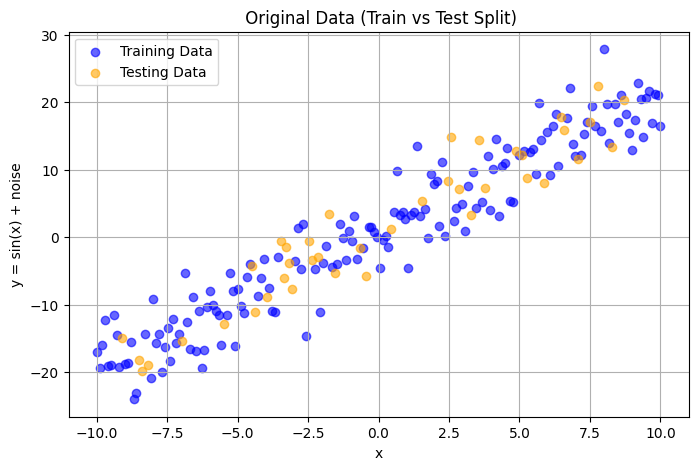

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, label='Training Data', color='blue', alpha=0.6)
plt.scatter(x_test, y_test, label='Testing Data', color='orange', alpha=0.6)
plt.title(" Original Data (Train vs Test Split)")
plt.xlabel("x")
plt.ylabel("y = sin(x) + noise")
plt.legend()
plt.grid(True)
plt.show()

# We will now create 3 types of models.  Each with a cascading depth of neurons to test the effect of neural layers on data accuracy.

#  SHALLOW NEURAL NETWORK (Few Layers)

In [9]:
# Shallow model
shallow_model = Sequential([
    Dense(10, input_shape=(1,), activation='relu'),
    Dense(1)
])
shallow_model.compile(optimizer='adam', loss='mse');

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# MODERATE MODEL (MORE LAYERS)

In [10]:
# Medium-depth model
medium_model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])
medium_model.compile(optimizer='adam', loss='mse')

# DENSE MODEL (MOST COMPLEX ONE WE WILL USE FOR NOW)

In [11]:
# --- Deep model ---
deep_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
deep_model.compile(optimizer='adam', loss='mse')

# We will now train the three models.

In [12]:
shallow_history = shallow_model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)
medium_history = medium_model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)
deep_history = deep_model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)


# Plotting and validation results

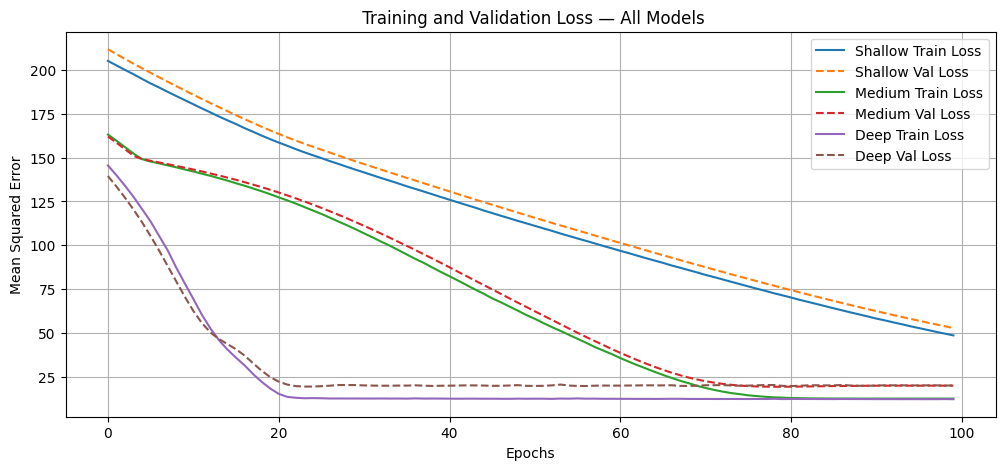

In [17]:
plt.figure(figsize=(12,5))
plt.plot(shallow_history.history['loss'], label='Shallow Train Loss')
plt.plot(shallow_history.history['val_loss'], label='Shallow Val Loss', linestyle='--')
plt.plot(medium_history.history['loss'], label='Medium Train Loss')
plt.plot(medium_history.history['val_loss'], label='Medium Val Loss', linestyle='--')
plt.plot(deep_history.history['loss'], label='Deep Train Loss')
plt.plot(deep_history.history['val_loss'], label='Deep Val Loss', linestyle='--')
plt.title(" Training and Validation Loss — All Models")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()


# We will now carry out model prediction


In [18]:
x_line = np.linspace(-10, 10, 100).reshape(-1, 1)
y_pred_shallow = shallow_model.predict(x_line)
y_pred_medium = medium_model.predict(x_line)
y_pred_deep = deep_model.predict(x_line)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 



#After carrying out the predictions we can visualise and compare the results and get a conclusion for the models

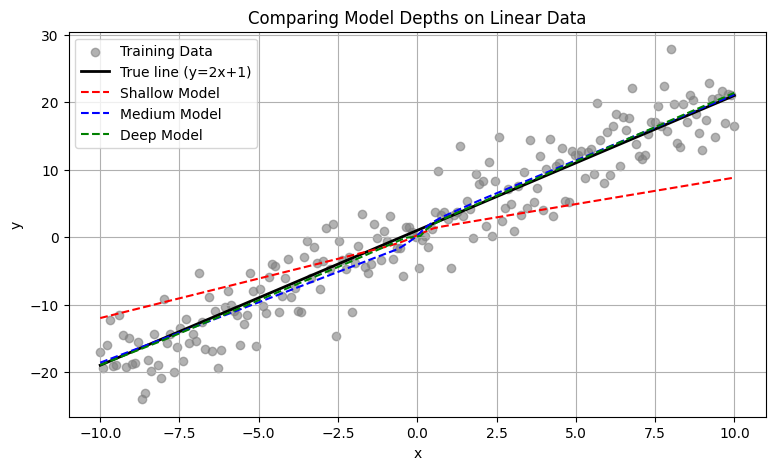

In [19]:
plt.figure(figsize=(9,5))
plt.scatter(x, y, color='gray', alpha=0.6, label='Training Data')  # Actual points
plt.plot(x_line, 2 * x_line + 1, label='True line (y=2x+1)', color='black', linewidth=2)
plt.plot(x_line, y_pred_shallow, label='Shallow Model', color='red', linestyle='--')
plt.plot(x_line, y_pred_medium, label='Medium Model', color='blue', linestyle='--')
plt.plot(x_line, y_pred_deep, label='Deep Model', color='green', linestyle='--')
plt.title("Comparing Model Depths on Linear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Conclusion Based on Model Predictions

From the visualization of the three models’ predictions against the true data trend:

The shallow model (with only one hidden layer) showed a limited ability to capture the full pattern of the data. Its prediction curve appeared less smooth and slightly offset, indicating underfitting — the model lacked enough capacity to learn the true relationship effectively.

The medium-depth model produced predictions that closely followed the data trend. Its curve was well-aligned with the underlying line, showing a good balance between complexity and generalization. This suggests it effectively captured both the linear relationship and small variations introduced by noise.

The deep model (with many hidden layers) performs well and is the most accurate, however if we had added more layers it would have resulted in overfitting of the model hence giving an inaccurate prediction of data